<a href="https://colab.research.google.com/github/JaswanthReddy15/Jaswanth_Reddy_INBT03921_AUG_2023/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
import nltk.stem
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data = pd.read_csv('/content/IMDB Dataset.csv', engine='python', error_bad_lines=False)
data.head()



<ipython-input-3-a967765a28d5>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/IMDB Dataset.csv', engine='python', error_bad_lines=False)
Skipping line 3982: unexpected end of data


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.shape

(3980, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     3980 non-null   object
 1   sentiment  3980 non-null   object
dtypes: object(2)
memory usage: 62.3+ KB


In [6]:
for i in range(5):
  print("review:",[i])
  print(data['review'].iloc[i],'\n')
  print('sentiment:',data['sentiment'].iloc[i],'\n\n')

review: [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is du

In [7]:
def no_of_words(text):
  words=text.split()
  word_count=len(words)
  return word_count

In [8]:
#text processing
data['word count']=data['review'].apply(no_of_words)

In [9]:
data.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


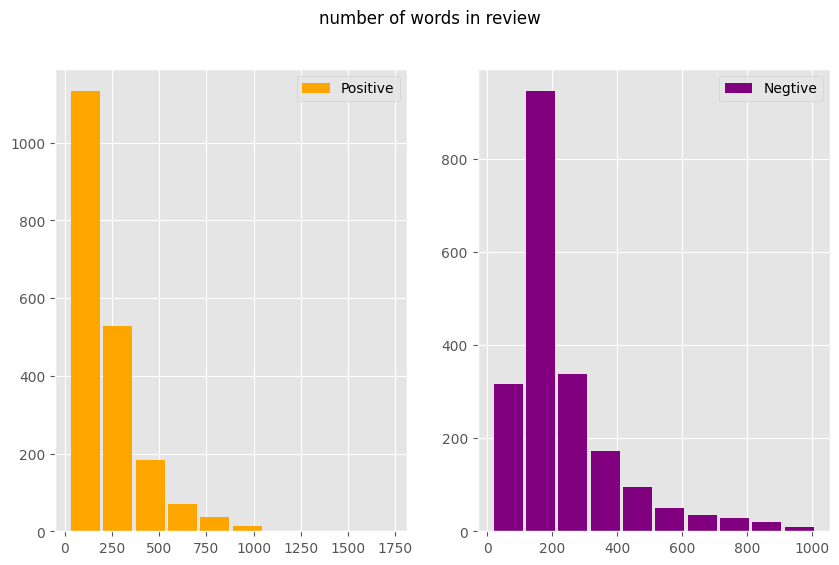

In [10]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].hist(data[data['sentiment']=='positive']['word count'],label='Positive',color='orange',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(data[data['sentiment']=='negative']['word count'],label='Negtive',color='purple',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle('number of words in review')
plt.show()

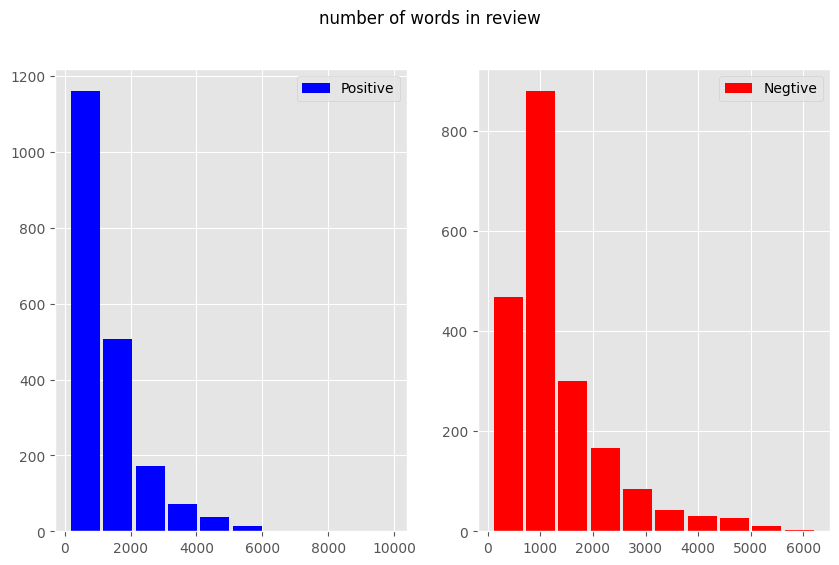

In [11]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].hist(data[data['sentiment']=='positive']['review'].str.len(),label='Positive',color='blue',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(data[data['sentiment']=='negative']['review'].str.len(),label='Negtive',color='red',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle('number of words in review')
plt.show()

In [12]:
data.sentiment.replace('positive',1,inplace=True)
data.sentiment.replace('negative',2,inplace=True)

In [13]:
data.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stop_words=set(stopwords.words('english'))

# DATA PROCESSING

In [17]:

def data_processing(text):
  text=text.lower()
  text=re.sub('<br/>','',text)
  text=re.sub(r"https\S+|ww\S+|http\S+",'',text,flags=re.MULTILINE)
  text=re.sub(r'\@w+|\#','',text)
  text=re.sub(r'[^\w\s]','',text)
  text_tokens=word_tokenize(text)
  filtered_text=[w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [18]:
data.review=data['review'].apply(data_processing)

In [19]:
duplicated_count=data.duplicated().sum()
print('number of duplicate entries: ',duplicated_count)

number of duplicate entries:  2


In [20]:
data=data.drop_duplicates('review')

In [21]:
#STEMMING ON THE DATA
stemmer=PorterStemmer()
def stemming(data):
  text=[stemmer.stem(word) for word in data]
  return data

In [22]:
data.review=data['review'].apply(lambda x: stemming(x))

In [23]:
positive_reviews = data[data.sentiment==1]
positive_reviews.head(10)

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production br br filming tech...,1,162
2,thought wonderful way spend time hot summer we...,1,166
4,petter matteis love time money visually stunni...,1,230
5,probably alltime favorite movie story selfless...,1,119
6,sure would like see resurrection dated seahunt...,1,150
9,like original gut wrenching laughter like movi...,1,33
14,fantastic movie three prisoners become famous ...,1,50
16,films simply remade one bad film fails capture...,1,146
18,remember filmit first film watched cinema pict...,1,129


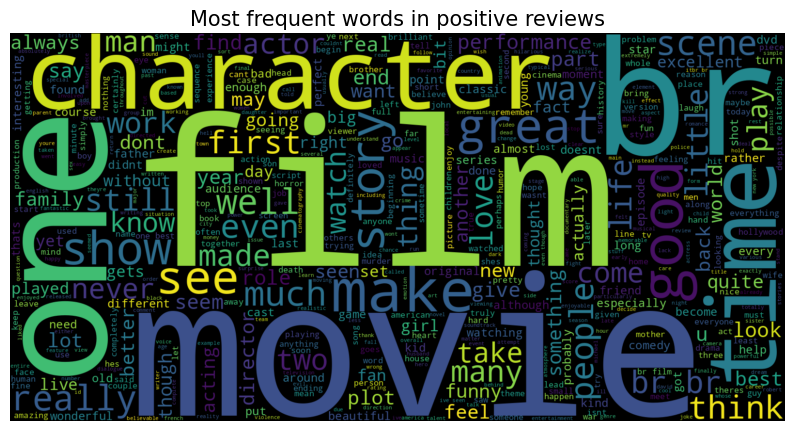

In [24]:
text=' '.join([word for word in positive_reviews ['review']])
plt.figure(figsize=(10,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews',fontsize = 15)
plt.show()

In [25]:
from collections import Counter
count = Counter()
for text in positive_reviews['review'].values:
  for word in text.split():
    count[word] +=3
count.most_common(20)

[('br', 13110),
 ('film', 9135),
 ('movie', 8475),
 ('one', 6081),
 ('like', 3777),
 ('good', 3345),
 ('story', 2886),
 ('see', 2850),
 ('great', 2754),
 ('time', 2619),
 ('well', 2577),
 ('would', 2538),
 ('also', 2436),
 ('really', 2403),
 ('much', 2274),
 ('first', 2112),
 ('even', 2103),
 ('get', 1959),
 ('films', 1914),
 ('best', 1881)]

In [26]:
positive_words = pd.DataFrame(count.most_common(20))
positive_words.colums = ['word', 'count']
positive_words

<ipython-input-26-123093681248>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  positive_words.colums = ['word', 'count']


,0,1
0,br,13110
1,film,9135
2,movie,8475
3,one,6081
4,like,3777
5,good,3345
6,story,2886
7,see,2850
8,great,2754
9,time,2619


In [28]:
negitive_reviews = data[data.sentiment==1]
negitive_reviews.head(10)

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production br br filming tech...,1,162
2,thought wonderful way spend time hot summer we...,1,166
4,petter matteis love time money visually stunni...,1,230
5,probably alltime favorite movie story selfless...,1,119
6,sure would like see resurrection dated seahunt...,1,150
9,like original gut wrenching laughter like movi...,1,33
14,fantastic movie three prisoners become famous ...,1,50
16,films simply remade one bad film fails capture...,1,146
18,remember filmit first film watched cinema pict...,1,129


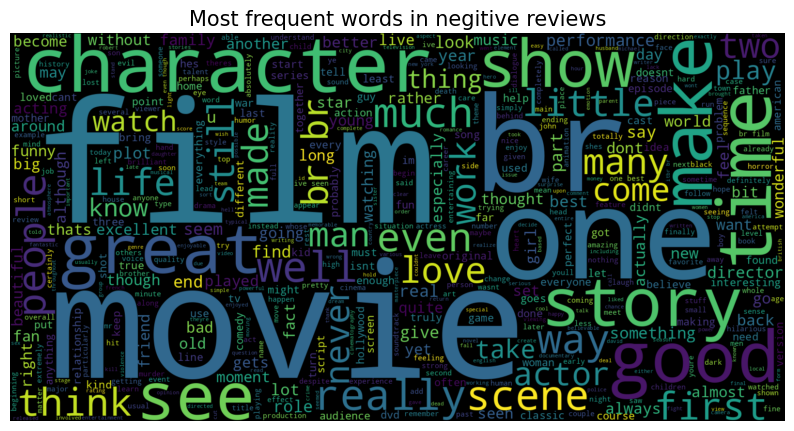

In [29]:
text=' '.join([word for word in negitive_reviews ['review']])
plt.figure(figsize=(10,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negitive reviews',fontsize = 15)
plt.show()

In [30]:
from collections import Counter
count = Counter()
for text in negitive_reviews['review'].values:
  for word in text.split():
    count[word] +=5
count.most_common(10)

[('br', 21850),
 ('film', 15225),
 ('movie', 14125),
 ('one', 10135),
 ('like', 6295),
 ('good', 5575),
 ('story', 4810),
 ('see', 4750),
 ('great', 4590),
 ('time', 4365)]

In [31]:
negitive_words = pd.DataFrame(count.most_common(20))
negitive_words.colums = ['word', 'count']
negitive_words

<ipython-input-31-41690fbcdb6a>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  negitive_words.colums = ['word', 'count']


,0,1
0,br,21850
1,film,15225
2,movie,14125
3,one,10135
4,like,6295
5,good,5575
6,story,4810
7,see,4750
8,great,4590
9,time,4365


# splitting the data


In [33]:
X = data['review']
Y = data['sentiment']
vect = TfidfVectorizer()
Y = vect.fit_transform(data['review'])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [35]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2784,)
Size of y_train:  (2784, 45107)
Size of x_test:  (1194,)
Size of y_test:  (1194, 45107)


# NAVIE BAYES CLASSIFICATION

In [38]:
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [39]:

def clean_text(text):
    cleaned_text = re.sub('<.*?>', '', text)
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply preprocessing techniques (from previous code)
data['review'] = data['review'].apply(clean_text)
data['review'] = data['review'].apply(remove_stopwords)
data['review'] = data['review'].apply(apply_lemmatization)

# Tokenization function (from previous code)
def tokenize(text):
    return word_tokenize(text)

# Apply tokenization to the 'review' column
data['tokens'] = data['review'].apply(tokenize)

# Convert tokenized reviews to numerical feature vectors using TF-IDF (from previous code)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features
tfidf_features = tfidf_vectorizer.fit_transform(data['review'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Split dataset into training and testing sets
X = tfidf_df
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Predict on the testing set
y_pred = naive_bayes.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8341708542713567
Confusion Matrix:
 [[327  61]
 [ 71 337]]
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.84      0.83       388
           2       0.85      0.83      0.84       408

    accuracy                           0.83       796
   macro avg       0.83      0.83      0.83       796
weighted avg       0.83      0.83      0.83       796



# MODEL EVALUATION

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Cross-validation for validation
cv_scores = cross_val_score(naive_bayes, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())

# Predict a review sentiment
def predict_sentiment(review):
    preprocessed_review = clean_text(review)
    preprocessed_review = remove_stopwords(preprocessed_review)
    preprocessed_review = apply_lemmatization(preprocessed_review)
    tokenized_review = tokenize(preprocessed_review)
    review_vector = tfidf_vectorizer.transform([" ".join(tokenized_review)])
    prediction = naive_bayes.predict(review_vector)
    return prediction[0]

review_to_predict = "This movie was really great! I enjoyed it a lot."
predicted_sentiment = predict_sentiment(review_to_predict)
print("Predicted Sentiment:", predicted_sentiment)

Cross-Validation Accuracy: 0.8280541070130527
Predicted Sentiment: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MultinomialNB was fitted with feature names



#PREDICTION WITH NEW DATA

In [41]:
#Create a function to predict sentiment:
def predict_sentiment(review):
    preprocessed_review = clean_text(review)
    preprocessed_review = remove_stopwords(preprocessed_review)
    preprocessed_review = apply_lemmatization(preprocessed_review)
    tokenized_review = tokenize(preprocessed_review)
    review_vector = tfidf_vectorizer.transform([" ".join(tokenized_review)])
    prediction = naive_bayes.predict(review_vector)
    return "Positive" if prediction[0] == 1 else "Negative"

In [42]:
#Create a command-line interface:
def main():
    print("Welcome to Movie Review Sentiment Predictor!")
    while True:
        review = input("Enter your movie review (or 'exit' to quit): ")
        if review.lower() == 'exit':
            break
        sentiment = predict_sentiment(review)
        print(f"Predicted Sentiment: {sentiment}")

if __name__ == "__main__":
    main()


Welcome to Movie Review Sentiment Predictor!
Enter your movie review (or 'exit' to quit): good
Predicted Sentiment: Negative
Enter your movie review (or 'exit' to quit): exit


Text(0, 0.5, 'Count')

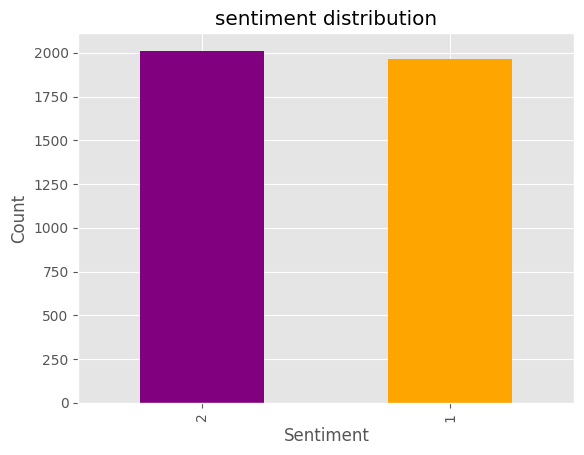

In [43]:

plt.title('sentiment distribution')
data['sentiment'].value_counts().plot(kind='bar',color=['purple', 'orange'])
plt.xlabel("Sentiment")
plt.ylabel("Count")

# CONFUSION_MATRIX

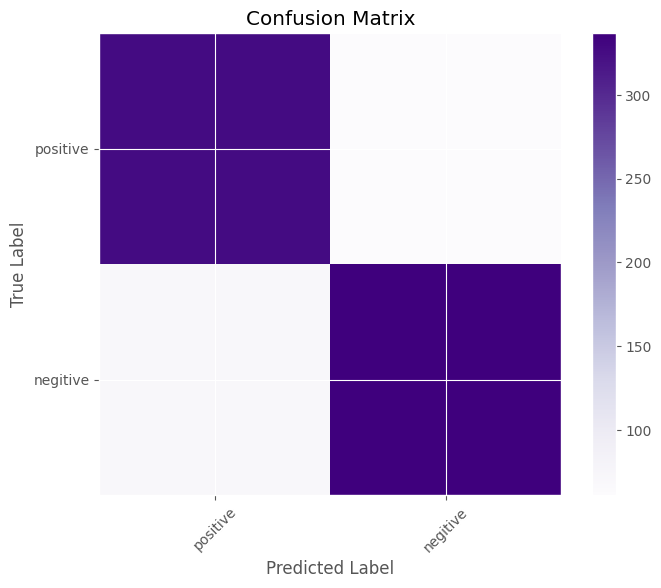

In [44]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
y_pred = naive_bayes.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, classes=['positive', 'negitive'])


# Precision-Recall Curve visualization

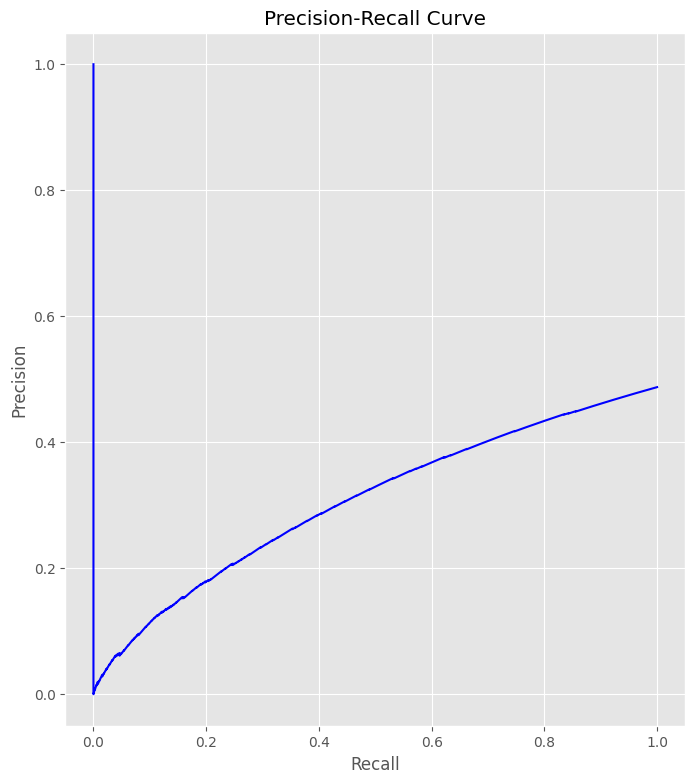

In [47]:
precision, recall, _ = precision_recall_curve(y_test, naive_bayes.predict_proba(X_test)[:, 1],pos_label=1)
plt.figure(figsize=(8, 9))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# ROC Curve visualization

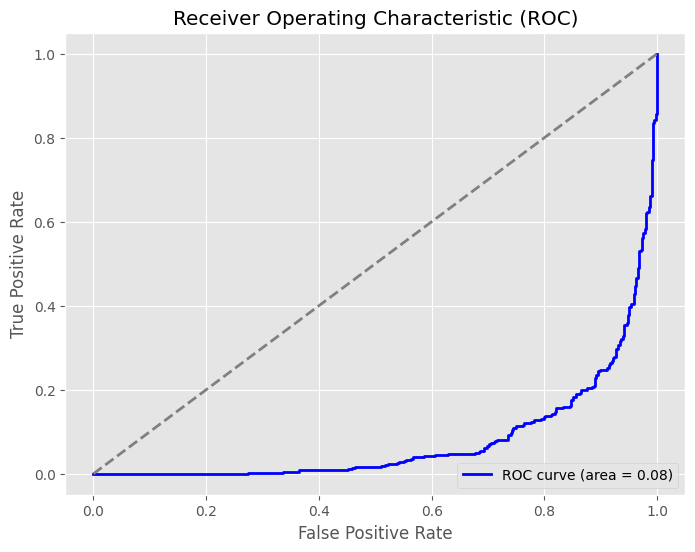

In [46]:
fpr, tpr, _ = roc_curve(y_test, naive_bayes.predict_proba(X_test)[:, 1],pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()